# Comparing

In [150]:
hdul1 = fits.open('/home/esavitch/astroML_data/SDSSspec/0524/spSpec-52027-0524-492.fit')
#hdul1.info()
data = np.asarray(list(hdul1[0].data))
flux3 = data[0]
#plt.plot(flux3)
#hdul1[0].data

3851 3842 3851


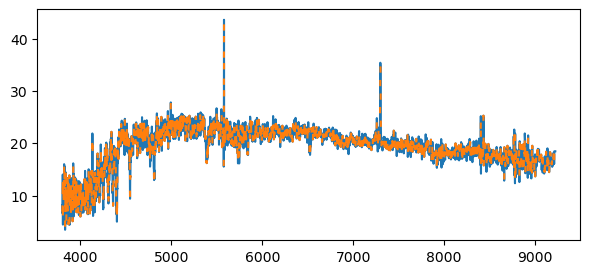

In [ ]:
hdul1 = fits.open('/home/esavitch/astroML_data/SDSSspec/0524/spSpec-52027-0524-492.fit')
data = np.asarray(list(hdul1[0].data))
flux3 = data[0]
#--------------------------
# Fetch single spectrum
plate = 524
mjd = 52027
fiber = 492
spec = fetch_sdss_spectrum(plate, mjd, fiber)
lam1, flux1 = spec.wavelength(), spec.spectrum # astroML
#-------------------------------------
hdul2 = fits.open('spec-0524-52027-0492.fits') #SDSS Direct
df = Table(data=hdul2[1].data).to_pandas() 
lam2, flux2 = 10**df['loglam'], df['flux']
#--------------------------------
plt.figure(figsize=(7,3))
plt.plot(lam1, flux1);
plt.plot(lam2, flux2, ls='--', dashes=(3,10));
#plt.plot(lam1, flux3);
print(len(flux1), len(flux2), len(flux3))

# AstroML
 * Examples: https://www.astroml.org/examples/datasets/index.html
   * https://www.astroml.org/examples/datasets/plot_sdss_spectrum.html

In [274]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy import units as u, constants as cc
from specutils import Spectrum1D
from specutils import SpectralRegion
from specutils.analysis import equivalent_width
from specutils.analysis import fwhm
hdul = fits.open('/home/esavitch/astroML_data/SDSSspec/0524/spSpec-52027-0524-492.fit')
hdul[2].columns.names

['wave',
 'waveErr',
 'waveMin',
 'waveMax',
 'sigma',
 'sigmaErr',
 'sigmaMin',
 'sigmaMax',
 'height',
 'heightErr',
 'continuum',
 'ew',
 'ewErr',
 'ewMin',
 'specIndex',
 'nsigma',
 'chisq',
 'nu',
 'restWave',
 'weight',
 'z',
 'zErr',
 'lineMask']

In [309]:
from astropy.table import Table
df = Table(data=hdul[2].data).to_pandas()
#df = df[df['restWave'].isin([4102.89, 6564.609863, 3729.875000])]
#df[['wave', 'waveErr', 'continuum', 'ew', 'ewErr', 'restWave', 'z', 'weight']]
#df.columns
df.iloc[[27,39,20]][['wave', 'waveErr', 'continuum', 'ew', 'ewErr', 'restWave', 'z', 'weight']]

,wave,waveErr,continuum,ew,ewErr,restWave,z,weight
27,4547.163574,0.383795,21.043352,-6.063605,0.295659,4102.890137,0.108363,0.0
39,7276.028320,1.279484,20.142763,0.464952,0.194603,6564.609863,0.108363,0.0
20,4134.632812,6.056813,11.462691,2.303455,0.253410,3729.875000,0.108363,0.0


In [307]:
np.asarray(hdul[1].data)[3]

(7298.5244, 0.13134766, 7284.5044, 7311.3906, 2.6971688, 0.12619543, 1., 10., 15.164679, 0.62198925, 20.0387, 5.1163096, 0.31110334, 2., -9999., -9999., 9.286052, 14, 4102.89, 0.5, 0.778817, -9999., b' ')

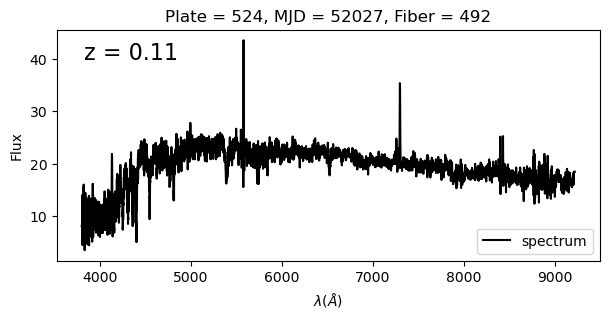

In [49]:
from matplotlib import pyplot as plt
from astroML.datasets import fetch_sdss_spectrum, sdss_corrected_spectra
#------------------------------------------------------------
# Fetch single spectrum
plate = 524
mjd = 52027
fiber = 492
spec = fetch_sdss_spectrum(plate, mjd, fiber)
#------------------------------------------------------------
# Plot the resulting spectrum
plt.figure(figsize=(7,3))
ax = plt.axes()
ax.plot(spec.wavelength(), spec.spectrum, '-k', label='spectrum')
#ax.plot(spec.wavelength(), spec.spectrum_cont, '-r', label='continuum')
#ax.plot(spec.wavelength(), spec.error, '-', color='gray', label='error')
ax.legend(loc=4)
ax.set_title('Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i' % locals())
ax.text(0.05, 0.95, 'z = %.2f' % spec.z, size=16,
        ha='left', va='top', transform=ax.transAxes)
ax.set_xlabel(r'$\lambda (\AA)$')
ax.set_ylabel('Flux')
#ax.set_ylim(-10, 300)
plt.show()

In [56]:
spec.z

0.108363

In [105]:
hdul = spec.hdulist
#hdul[5].data['name']
data = hdul[2].data
#hdul[3].data
hdInd = np.argwhere(data['restWave']==4102.89)[0][0]
data['ew'][hdInd]

-6.0636053

In [51]:
spec.get_line_ew(4102.89)
#spec.get_line_ew(4547.39)
#spec.get_line_ew(3729.88)

array([-6.0636053], dtype='>f4')

# Test Spectra Fits File: spec-0524-52027-0492
 * Plate: 0524
 * MJD: 52027
 * FiberID(s): 0492
 * Redshift: $z = 0.108338 \pm 1.61552\times 10^{-5}$
 * Spec-ID: 590106825123194880
 * Obj-ID: 1237651736837750929
 * SDSS J130431.15+024703.5
 * Wavelengths are in vaccuum units
 * __Right Ascension (RA)__: 13:04:31.16, 196.12985 degrees
 * __Declination (Dec)__: +02:47:03.52, 2.7843111 degrees
 
(from French et al., 2021) https://iopscience.iop.org/article/10.1088/1538-3873/ac0a59/pdf

(SDSS spectra) https://dr18.sdss.org/optical/spectrum/view?id=390053&plate=524&mjd=52027&fiberid=492
 * http://cas.sdss.org/dr18/VisualTools/quickobj?plate=524&mjd=52027&fiber=492
 * http://specdash.idies.jhu.edu/?catalog=sdss&specid=590106825123194880
 * https://dr9.sdss.org/spectrumDetail?plateid=524&mjd=52027&fiber=492

(FITS) https://docs.astropy.org/en/stable/io/fits/

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy import units as u, constants as cc
from specutils import Spectrum1D
from specutils import SpectralRegion
from specutils.analysis import equivalent_width
from specutils.analysis import fwhm
hdul = fits.open('spec-0524-52027-0492.fits')
#hdul.info()v
# data = hdul[0].data
# h1 = hdul[0].header
#-----------------
ind = np.argwhere(np.asarray(hdul[2].columns.names)=='Z')[0][0]
data = list(hdul[2].data)
redShift = data[0][ind] 
#-----------------
#hdul[1].columns.names
hdul[1].columns.names
#hdul[0].header

['flux', 'loglam', 'ivar', 'and_mask', 'or_mask', 'wdisp', 'sky', 'model']

In [2]:
#for i in range(len(hdul)):
#hdul[i]
head = hdul[3].header
data = hdul[3].data
hdul[3].columns.names
#------------------------
# hDelta = np.argwhere(data['LINENAME']=='H_delta')[0][0]
# print(f"H-Delta EW: {data['LINEEW'][hDelta]}")
# for i in range(len(hdul[3].columns.names)):
#     print(f"Line={data['LINENAME'][i]}, Wav={data['LINEWave'][i]}, EW={data['LINEEW'][i]}") 
#     # values positive for absorption lines, negative for emission lines
#------------------------
hDelta = np.argwhere(data['LINENAME']=='H_delta')[0][0]
print(f"H-Delta:   Wav = {data['LINEWave'][hDelta]:.2f}=>{data['LINEWave'][hDelta]*(1+redShift):.2f},  EW = {data['LINEEW'][hDelta]:.2f} +/- {data['LINEEW_Err'][hDelta]:.2f},  Cont = {data['LINECONTLEVEL'][hDelta]:.2f},  Area = {data['LINEAREA'][hDelta]:.2f}")
hDelta = np.argwhere(data['LINENAME']=='H_alpha')[0][0]
print(f"H-Alpha:   Wav = {data['LINEWave'][hDelta]:.2f}=>{data['LINEWave'][hDelta]*(1+redShift):.2f},  EW = {data['LINEEW'][hDelta]:.2f} +/- {data['LINEEW_Err'][hDelta]:.2f},  Cont = {data['LINECONTLEVEL'][hDelta]:.2f},  Area = {data['LINEAREA'][hDelta]:.2f}")
hDelta = np.argwhere(data['LINENAME']=='[O_II] 3725')[0][0]
print(f"[OII]3725:   Wav = {data['LINEWave'][hDelta]:.2f}=>{data['LINEWave'][hDelta]*(1+redShift):.2f},  EW = {data['LINEEW'][hDelta]:.2f} +/- {data['LINEEW_Err'][hDelta]:.2f},  Cont = {data['LINECONTLEVEL'][hDelta]:.2f},  Area = {data['LINEAREA'][hDelta]:.2f}")
hDelta = np.argwhere(data['LINENAME']=='[O_II] 3727')[0][0]
print(f"[OII]3727:   Wav = {data['LINEWave'][hDelta]:.2f}=>{data['LINEWave'][hDelta]*(1+redShift):.2f},  EW = {data['LINEEW'][hDelta]:.2f} +/- {data['LINEEW_Err'][hDelta]:.2f},  Cont = {data['LINECONTLEVEL'][hDelta]:.2f},  Area = {data['LINEAREA'][hDelta]:.2f}")

H-Delta:   Wav = 4102.89=>4547.39,  EW = -4.61 +/- 0.42,  Cont = 19.83,  Area = -91.37
H-Alpha:   Wav = 6564.61=>7275.81,  EW = 4.28 +/- 0.38,  Cont = 15.67,  Area = 67.09
[OII]3725:   Wav = 3727.09=>4130.88,  EW = 2.85 +/- 0.47,  Cont = 10.49,  Area = 29.90
[OII]3727:   Wav = 3729.88=>4133.96,  EW = 4.64 +/- 0.45,  Cont = 10.37,  Area = 48.16


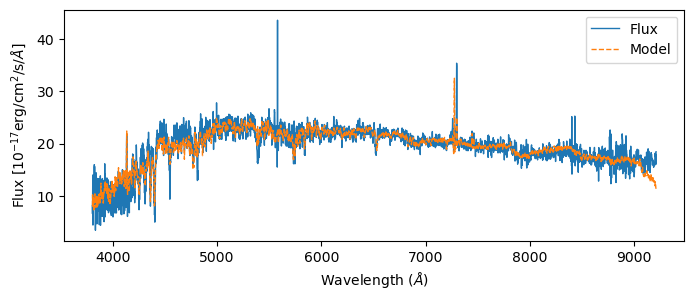

In [374]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
hdul = fits.open('spec-0524-52027-0492.fits')
data = np.asarray(list(hdul[1].data))
flux0, logLam, fluxSky, fluxModel = data.T[0], data.T[1], data.T[-2],data.T[-1]
lam = 10**logLam
fluxLam = flux0*1e-17*u.erg/u.cm**2/u.s/u.AA
fluxHz = np.asarray([f.to(u.erg/u.cm**2/u.s/u.Hz, equivalencies=u.spectral_density(l*u.AA)).value for f,l in zip(fluxLam, lam)])
plt.figure(figsize=(8,3))
plt.plot(lam, flux0, lw=1, label='Flux');
plt.plot(lam, fluxModel, lw=1, ls='--', label='Model');
#plt.plot(lam, fluxSky, lw=1, ls='--', label='Sky');
plt.ylabel(r'Flux $[10^{-17}\text{erg/cm}^2\text{/s/}\AA]$');
plt.xlabel(r'Wavelength $(\AA)$');
plt.legend();

## Balmer Break

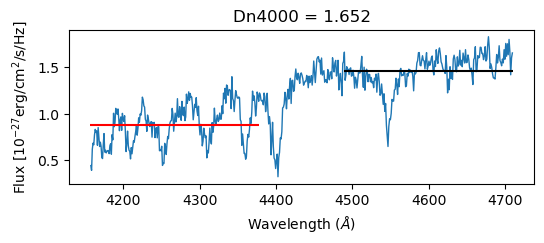

In [5]:
plt.figure(figsize=(6,2));
l1, l2, l3, l4 = 4050, 4250, 3750, 3950
# l1, l2, l3, l4 = 4050, 4250, min(lam), min(lam)+200
#l1, l2, l3, l4 = 4000, 4100, 3850, 3950
l1, l2, l3, l4 = l1*(1+redShift), l2*(1+redShift), l3*(1+redShift), l4*(1+redShift)
ll = (lam>l3)&(lam<l2)
lam2, flux2 = lam[ll], fluxHz[ll]
plt.plot(lam2, flux2/1e-27, lw=1, label='Flux');
plt.ylabel(r'Flux $[10^{-27}\text{erg/cm}^2\text{/s/Hz}]$');
plt.xlabel(r'Wavelength $(\AA)$');
fluxA = np.mean(fluxHz[(lam>l1)&(lam<l2)])
fluxB = np.mean(fluxHz[(lam>l3)&(lam<l4)])
plt.hlines(y=fluxA/1e-27, xmin=l1, xmax=l2, color='k');
plt.hlines(y=fluxB/1e-27, xmin=l3, xmax=l4, color='r');
dn4000 = fluxA/fluxB
plt.title(f'Dn4000 = {dn4000:.3f}');
#plt.xlim(min(lam), 4250);

## Lick Indice: H-Delta_A

a = 0.006692046615480857
b = -9.084049042827608
Equivalent Width fr/ Int: 7.24, 7.41


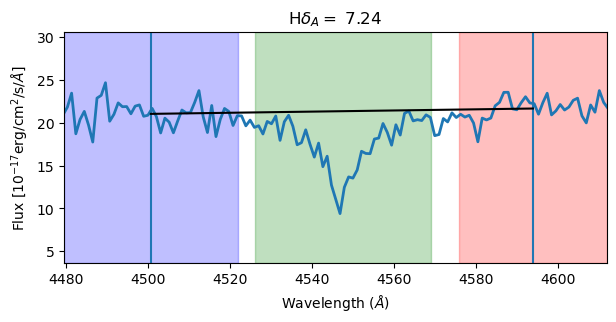

In [179]:
#lamCenter = 6564.61 # H-Alpha
lamCenter = 4102.89 # H-Delta
# lamCenter = 3727.09 # [OII] 3725
# lamCenter = 3729.88 # [OII] 3727
hdA = [4041.60,4079.75, 4083.50, 4122.25, 4128.50, 4161]
hdA = [ha*(1+redShift) for ha in hdA]
dw = 50 # range to fit normalization to
wMin, wMax = lamCenter-dw, lamCenter+dw
plt.figure(figsize=(7,3));
plt.plot(lam, flux0, lw=2, label='Flux');
ax = plt.gca()
ax.set_xlim(hdA[0], hdA[-1])
ax.axvline(lamCenter, c='k', label=fr'{lamCenter:.1f}$\mathrm{{\AA}}$');
l3 = (lam>wMin)&(lam<wMax)
ax.set_ylim(min(flux0[l3])-.4*min(flux0[l3]), max(flux0[l3])+.4*max(flux0[l3]));
ax.axvspan(hdA[0], hdA[1], alpha=.25, color='b');
ax.axvspan(hdA[2], hdA[3], alpha=.25, color='g');
ax.axvspan(hdA[4], hdA[5], alpha=.25, color='r');
fL = np.mean(flux0[(lam>hdA[0])&(lam<hdA[1])])
fR = np.mean(flux0[(lam>hdA[4])&(lam<hdA[5])])
lL, lR = np.mean([hdA[0], hdA[1]]), np.mean([hdA[4], hdA[5]])
coefficients = np.polyfit([lL, lR], [fL, fR], 1)
# Print the findings
print('a =', coefficients[0])
print('b =', coefficients[1])
#---------------------------------
poly = np.poly1d(coefficients)
ax.axvline(lL)
ax.axvline(lR)
lM = np.linspace(lL, lR, 100)
fM = poly(lM)
plt.plot(lM, fM, c='k')
#---------------------------------
ll = (lam>=hdA[2])&(lam<=hdA[3])
lM = lam[ll]
fC, fS = poly(lM), flux0[ll]
from scipy import integrate
int1 = integrate.cumtrapz(1-fS/fC, lM)[-1]
int2 = integrate.simpson(1-fS/fC, lM)
print(f"Equivalent Width fr/ Int: {int1:.2f}, {int2:.2f}")
plt.ylabel(r'Flux $[10^{-17}\text{erg/cm}^2\text{/s/}\AA]$');
plt.xlabel(r'Wavelength $(\AA)$');
plt.title(fr'H$\delta_A=$ {int1:.2f}');

# Equivalent Width: H-Delta

dl = 40, EW: 4.76 (+1.21/-1.10)


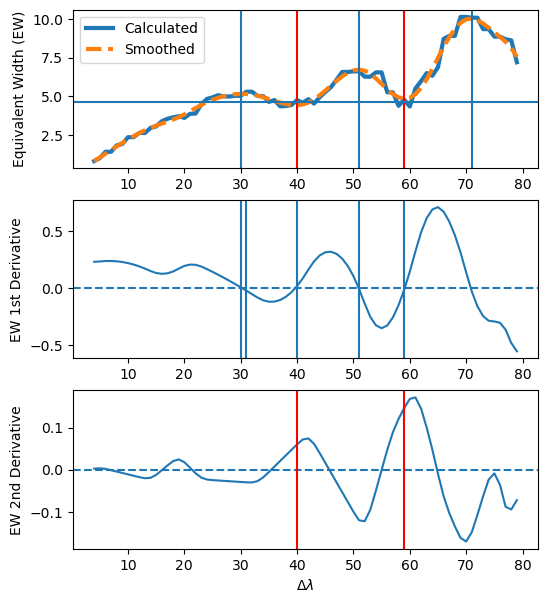

In [230]:
lamCenter = 4102.89 # H-Delta
#lamCenter = 6564.61 # H-Alpha
#lamCenter = 3729.88 # [OII] 3727
lamCenter *= (1+redShift)
#dw = 50 # range to fit normalization to
#wMin, wMax = lamCenter-dw, lamCenter+dw
#-------------------------------------------
from scipy.interpolate import make_interp_spline, interp1d
def interp(w, f, wMin=1e3, wMax=1e7, length = 1):
    wInterp = np.linspace(wMin, wMax, length*len(w))
    spl = make_interp_spline(w, f)
    fInterp = spl(wInterp)
    return wInterp, fInterp
wav1, fluxFit = interp(lam, flux0, wMin=wMin, wMax=wMax)
#-------------------
import heapq
closest = lambda lst, K, n=1: heapq.nsmallest(n, lst, key=lambda x: abs(x-K))
#-------------------
dList, ewL0, ewL1, ewL2, ewL3, ewL4, ewL5 = [], [], [], [], [], [], []
dll = np.arange(4,80,1) # range to look for EW
for dl in dll:
    l1, l2 = (lamCenter-dl/2)*u.AA, (lamCenter+dl/2)*u.AA
    f1 = flux0[lam==lam[np.argmin(np.abs(lam-l1.value))]][0] 
    f2 = flux0[lam==lam[np.argmin(np.abs(lam-l2.value))]][0]
    l3 = (lam>l1.value)&(lam<l2.value)
    fS, x = flux0[l3], lam[l3]
    dww=5
    lL, lR = l1.value-dww, l2.value+dww
    fL = np.mean(flux0[(lam>lL)&(lam<l1.value)])
    fR = np.mean(flux0[(lam>l2.value)&(lam<lR)])
    fC = np.mean([fL, fR])
    #print(fL, fR, fC, '\n')
    coefficients = np.polyfit([np.mean([lL,l1.value]), np.mean([lR,l2.value])], [fL, fR], 1)
    poly = np.poly1d(coefficients)
    fC = poly(x)
    ewL0.append(integrate.cumtrapz(1-fS/fC, x)[-1])
#------------------------------
plt.figure(figsize=(6,7))
ax = plt.subplot(3,1,1)
ax.set(ylabel='Equivalent Width (EW)')
plt.plot(dll, ewL0, lw=3, label='Calculated');
xx = np.linspace(min(dll), max(dll), 1000)
from scipy.interpolate import splrep, BSpline
tck = splrep(dll, ewL0, s=5)
yy = BSpline(*tck)(dll)
plt.plot(dll, yy, label='Smoothed', lw=3, ls='--');
from scipy.signal import argrelextrema
inds, = argrelextrema(yy, np.greater)
for i in inds: ax.axvline(dll[i])
inds, = argrelextrema(yy, np.less)
for i in inds: ax.axvline(dll[i], c='r')
plt.legend();
ax = plt.gca()
ax.axhline(4.61);
ax = plt.subplot(3,1,2)
ax.set(ylabel='EW 1st Derivative')
# dy = np.diff(yy)
# ax.plot(dll[1:], dy);
dy = np.gradient(yy)
ax.plot(dll, dy);
ax.axhline(0, ls='--')
inds = [np.argwhere(dy==dy_)[0][0] for dy_ in closest(dy,0, n=5)]
for i in inds: ax.axvline(dll[i])
ax = plt.subplot(3,1,3)
ax.set(ylabel='EW 2nd Derivative', xlabel=r'$\Delta \lambda$')
#dyy = np.diff(dy)
dyy = np.gradient(dy)
ax.axhline(0, ls='--')
ax.plot(dll, dyy);
inds = [ii for ii in inds if dyy[ii]>0]
for i in inds: ax.axvline(dll[i], color='red')
dlBest = dll[min(inds)]
ewBest = ewL0[min(inds)]
dM, dP = dll[min(inds)-5], dll[min(inds)+5]
ewM, ewP = np.asarray(ewL0)[dll==dM][0], np.asarray(ewL0)[dll==dP][0]
ewErrP = abs(ewP-ewBest)
ewErrM = abs(ewM-ewBest)
ewErr0 = np.sqrt(abs(ewBest))/2
ewErrP = np.sqrt(ewErrP**2+ewErr0**2)
ewErrM = np.sqrt(ewErrM**2+ewErr0**2)
print(f"dl = {dlBest}, EW: {ewBest:.2f} (+{ewErrP:.2f}/-{ewErrM:.2f})")

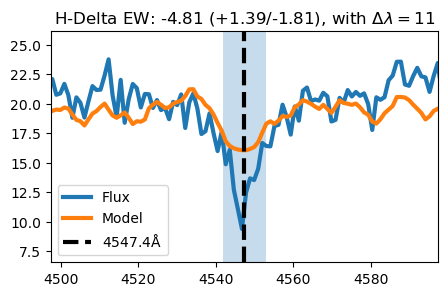

In [250]:
lamCenter = 4102.89 # H-Delta
lamCenter *= (1+redShift)
dw = 50 # range to fit normalization to
wMin, wMax = lamCenter-dw, lamCenter+dw
plt.figure(figsize=(5,3));
plt.plot(lam, flux0, lw=3, label='Flux');
plt.plot(lam, fluxModel, lw=3, label='Model');
ax = plt.gca()
ax.set_xlim(wMin, wMax)
ax.axvline(lamCenter, c='k', label=fr'{lamCenter:.1f}$\mathrm{{\AA}}$', lw=3, ls='--');
l3 = (lam>wMin)&(lam<wMax)
ax.set_ylim(min(flux0[l3])-.3*min(flux0[l3]), max(flux0[l3])+.1*max(flux0[l3]))
#--------------------------------------
dl = dlBest  # range to look for EW
l1, l2 = (lamCenter-dl/2)*u.AA, (lamCenter+dl/2)*u.AA
ax.axvspan(l1.value, l2.value, alpha=0.25);
#--------------------------------------
plt.title(fr"H-Delta EW: {ewBest:.2f} (+{ewErrP:.2f}/-{ewErrM:.2f}), with $\Delta \lambda=${dlBest}");
plt.legend();

# Equivalent Width: [OII 3727]

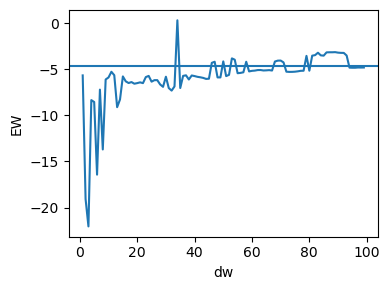

In [235]:
#lamCenter = 4102.89 # H-Delta
#lamCenter = 6564.61 # H-Alpha
lamCenter = 3729.88 # [OII] 3727
lamCenter *= (1+redShift)
#dw = 50 # range to fit normalization to
#wMin, wMax = lamCenter-dw, lamCenter+dw
#-------------------------------------------
from scipy.interpolate import make_interp_spline, interp1d
def interp(w, f, wMin=1e3, wMax=1e7, length = 1):
    wInterp = np.linspace(wMin, wMax, length*len(w))
    spl = make_interp_spline(w, f)
    fInterp = spl(wInterp)
    return wInterp, fInterp
wav1, fluxFit = interp(lam, flux0, wMin=wMin, wMax=wMax)
#-------------------
import heapq
closest = lambda lst, K, n=1: heapq.nsmallest(n, lst, key=lambda x: abs(x-K))
#-------------------
dwList = []
ewLL = []
for dww in np.arange(1,100,1):
    dwList.append(dww)
    dList, ewL0, ewL1, ewL2, ewL3, ewL4, ewL5 = [], [], [], [], [], [], []
    dll = np.arange(4,80,1) # range to look for EW
    for dl in dll:
        l1, l2 = (lamCenter-dl/2)*u.AA, (lamCenter+dl/2)*u.AA
        f1 = flux0[lam==lam[np.argmin(np.abs(lam-l1.value))]][0] 
        f2 = flux0[lam==lam[np.argmin(np.abs(lam-l2.value))]][0]
        l3 = (lam>l1.value)&(lam<l2.value)
        fS, x = flux0[l3], lam[l3]
        lL, lR = l1.value-dww, l2.value+dww
        fL = np.mean(flux0[(lam>lL)&(lam<l1.value)])
        fR = np.mean(flux0[(lam>l2.value)&(lam<lR)])
        fC = np.mean([fL, fR])
        #print(fL, fR, fC, '\n')
        coefficients = np.polyfit([np.mean([lL,l1.value]), np.mean([lR,l2.value])], [fL, fR], 1)
        poly = np.poly1d(coefficients)
        fC = poly(x)
        ewL0.append(integrate.cumtrapz(1-fS/fC, x)[-1])
    #------------------------------
    plt.figure(figsize=(6,7))
    ax = plt.subplot(3,1,1)
    ax.set(ylabel='Equivalent Width (EW)')
    plt.plot(dll, ewL0, lw=3, label='Calculated');
    xx = np.linspace(min(dll), max(dll), 1000)
    from scipy.interpolate import splrep, BSpline
    tck = splrep(dll, ewL0, s=5)
    yy = BSpline(*tck)(dll)
    plt.plot(dll, yy, label='Smoothed', lw=3, ls='--');
    from scipy.signal import argrelextrema
    inds, = argrelextrema(yy, np.greater)
    for i in inds: ax.axvline(dll[i])
    inds, = argrelextrema(yy, np.less)
    for i in inds: ax.axvline(dll[i], c='r')
    plt.legend();
    ax = plt.gca()
    ax.axhline(4.61);
    ax = plt.subplot(3,1,2)
    ax.set(ylabel='EW 1st Derivative')
    # dy = np.diff(yy)
    # ax.plot(dll[1:], dy);
    dy = np.gradient(yy)
    ax.plot(dll, dy);
    ax.axhline(0, ls='--')
    inds = [np.argwhere(dy==dy_)[0][0] for dy_ in closest(dy,0, n=5)]
    for i in inds: ax.axvline(dll[i])
    ax = plt.subplot(3,1,3)
    ax.set(ylabel='EW 2nd Derivative', xlabel=r'$\Delta \lambda$')
    #dyy = np.diff(dy)
    dyy = np.gradient(dy)
    ax.axhline(0, ls='--')
    ax.plot(dll, dyy);
    inds = [ii for ii in inds if dyy[ii]>0]
    for i in inds: ax.axvline(dll[i], color='red')
    dlBest = dll[min(inds)]
    ewBest = ewL0[min(inds)]
    dM, dP = dll[min(inds)-5], dll[min(inds)+5]
    ewM, ewP = np.asarray(ewL0)[dll==dM][0], np.asarray(ewL0)[dll==dP][0]
    ewErrP = abs(ewP-ewBest)
    ewErrM = abs(ewM-ewBest)
    ewErr0 = np.sqrt(abs(ewBest))/2
    ewErrP = np.sqrt(ewErrP**2+ewErr0**2)
    ewErrM = np.sqrt(ewErrM**2+ewErr0**2)
    #print(f"dw={dww}, dl = {dlBest}, EW: {ewBest:.2f} (+{ewErrP:.2f}/-{ewErrM:.2f})")
    #plt.show();
    plt.close();
    ewLL.append(ewBest)
plt.figure(figsize=(4,3))
plt.plot(dwList, ewLL)
plt.gca().axhline(-4.64);
plt.xlabel('dw');plt.ylabel('EW');
plt.tight_layout()

dw = 100 ==> dl = 11, EW: -4.81 (+1.39/-1.81)


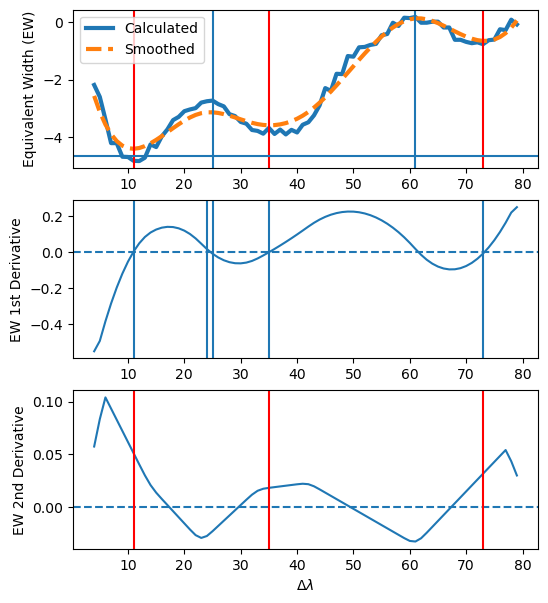

In [244]:
#lamCenter = 4102.89 # H-Delta
#lamCenter = 6564.61 # H-Alpha
lamCenter = 3729.88 # [OII] 3727
lamCenter *= (1+redShift)
#dw = 50 # range to fit normalization to
#wMin, wMax = lamCenter-dw, lamCenter+dw
#-------------------------------------------
from scipy.interpolate import make_interp_spline, interp1d
def interp(w, f, wMin=1e3, wMax=1e7, length = 1):
    wInterp = np.linspace(wMin, wMax, length*len(w))
    spl = make_interp_spline(w, f)
    fInterp = spl(wInterp)
    return wInterp, fInterp
wav1, fluxFit = interp(lam, flux0, wMin=wMin, wMax=wMax)
#-------------------
import heapq
closest = lambda lst, K, n=1: heapq.nsmallest(n, lst, key=lambda x: abs(x-K))
#-------------------
dww=100
dList, ewL0, ewL1, ewL2, ewL3, ewL4, ewL5 = [], [], [], [], [], [], []
dll = np.arange(4,80,1) # range to look for EW
for dl in dll:
    l1, l2 = (lamCenter-dl/2)*u.AA, (lamCenter+dl/2)*u.AA
    f1 = flux0[lam==lam[np.argmin(np.abs(lam-l1.value))]][0] 
    f2 = flux0[lam==lam[np.argmin(np.abs(lam-l2.value))]][0]
    l3 = (lam>l1.value)&(lam<l2.value)
    fS, x = flux0[l3], lam[l3]
    lL, lR = l1.value-dww, l2.value+dww
    fL = np.mean(flux0[(lam>lL)&(lam<l1.value)])
    fR = np.mean(flux0[(lam>l2.value)&(lam<lR)])
    fC = np.mean([fL, fR])
    #print(fL, fR, fC, '\n')
    coefficients = np.polyfit([np.mean([lL,l1.value]), np.mean([lR,l2.value])], [fL, fR], 1)
    poly = np.poly1d(coefficients)
    fC = poly(x)
    ewL0.append(integrate.cumtrapz(1-fS/fC, x)[-1])
#------------------------------
plt.figure(figsize=(6,7))
ax = plt.subplot(3,1,1)
ax.set(ylabel='Equivalent Width (EW)')
plt.plot(dll, ewL0, lw=3, label='Calculated');
xx = np.linspace(min(dll), max(dll), 1000)
from scipy.interpolate import splrep, BSpline
tck = splrep(dll, ewL0, s=5)
yy = BSpline(*tck)(dll)
plt.plot(dll, yy, label='Smoothed', lw=3, ls='--');
from scipy.signal import argrelextrema
inds, = argrelextrema(yy, np.greater)
for i in inds: ax.axvline(dll[i])
inds, = argrelextrema(yy, np.less)
for i in inds: ax.axvline(dll[i], c='r')
plt.legend();
ax = plt.gca()
ax.axhline(-4.64);
ax = plt.subplot(3,1,2)
ax.set(ylabel='EW 1st Derivative')
# dy = np.diff(yy)
# ax.plot(dll[1:], dy);
dy = np.gradient(yy)
ax.plot(dll, dy);
ax.axhline(0, ls='--')
inds = [np.argwhere(dy==dy_)[0][0] for dy_ in closest(dy,0, n=5)]
for i in inds: ax.axvline(dll[i])
ax = plt.subplot(3,1,3)
ax.set(ylabel='EW 2nd Derivative', xlabel=r'$\Delta \lambda$')
#dyy = np.diff(dy)
dyy = np.gradient(dy)
ax.axhline(0, ls='--')
ax.plot(dll, dyy);
inds = [ii for ii in inds if dyy[ii]>0]
for i in inds: ax.axvline(dll[i], color='red')
dlBest = dll[min(inds)]
ewBest = ewL0[min(inds)]
dM, dP = dll[min(inds)-5], dll[min(inds)+5]
ewM, ewP = np.asarray(ewL0)[dll==dM][0], np.asarray(ewL0)[dll==dP][0]
ewErrP = abs(ewP-ewBest)
ewErrM = abs(ewM-ewBest)
ewErr0 = np.sqrt(abs(ewBest))/2
ewErrP = np.sqrt(ewErrP**2+ewErr0**2)
ewErrM = np.sqrt(ewErrM**2+ewErr0**2)
print(f"dw = {dww} ==> dl = {dlBest}, EW: {ewBest:.2f} (+{ewErrP:.2f}/-{ewErrM:.2f})")
plt.show();

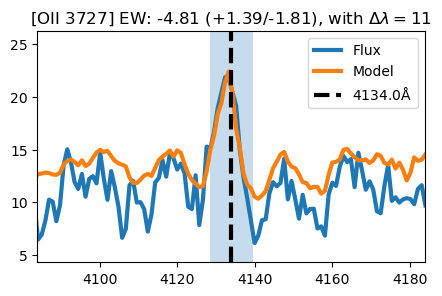

In [251]:
lamCenter = 3729.88 # [OII] 3727
lamCenter *= (1+redShift)
dw = 50 # range to fit normalization to
wMin, wMax = lamCenter-dw, lamCenter+dw
plt.figure(figsize=(5,3));
plt.plot(lam, flux0, lw=3, label='Flux');
plt.plot(lam, fluxModel, lw=3, label='Model');
ax = plt.gca()
ax.set_xlim(wMin, wMax)
ax.axvline(lamCenter, c='k', label=fr'{lamCenter:.1f}$\mathrm{{\AA}}$', lw=3, ls='--');
l3 = (lam>wMin)&(lam<wMax)
ax.set_ylim(min(flux0[l3])-.3*min(flux0[l3]), max(flux0[l3])+.2*max(flux0[l3]))
#--------------------------------------
dl = dlBest  # range to look for EW
l1, l2 = (lamCenter-dl/2)*u.AA, (lamCenter+dl/2)*u.AA
ax.axvspan(l1.value, l2.value, alpha=0.25);
#--------------------------------------
plt.title(fr"[OII 3727] EW: {ewBest:.2f} (+{ewErrP:.2f}/-{ewErrM:.2f}), with $\Delta \lambda=${dlBest}");
plt.legend();

# Equivalent Width: [H$\alpha$]

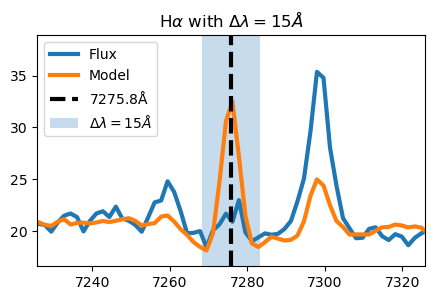

In [352]:
lamCenter = 6564.61 # H-Alpha
lamCenter *= (1+redShift)
dw = 50 # range to fit normalization to
wMin, wMax = lamCenter-dw, lamCenter+dw
plt.figure(figsize=(5,3));
plt.plot(lam, flux0, lw=3, label='Flux');
plt.plot(lam, fluxModel, lw=3, label='Model');
ax = plt.gca()
ax.set_xlim(wMin, wMax)
ax.axvline(lamCenter, c='k', label=fr'{lamCenter:.1f}$\mathrm{{\AA}}$', lw=3, ls='--');
l3 = (lam>wMin)&(lam<wMax)
ax.set_ylim(min(flux0[l3])-.1*min(flux0[l3]), max(flux0[l3])+.1*max(flux0[l3]))
#--------------------------------------
dl = 15  # range to look for EW
l1, l2 = (lamCenter-dl/2)*u.AA, (lamCenter+dl/2)*u.AA
ax.axvspan(l1.value, l2.value, alpha=0.25, label=r'$\Delta \lambda=15\AA$');
#--------------------------------------
plt.legend();
plt.title(fr"H$\alpha$ with $\Delta \lambda=15\AA$");

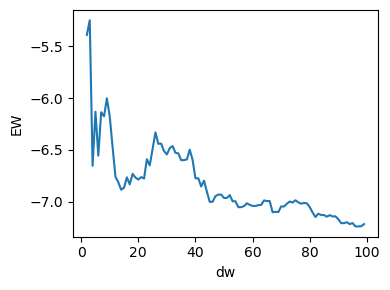

In [369]:
#lamCenter = 4102.89 # H-Delta
lamCenter = 6564.61 # H-Alpha
#lamCenter = 3729.88 # [OII] 3727
lamCenter *= (1+redShift)
#dw = 50 # range to fit normalization to
#wMin, wMax = lamCenter-dw, lamCenter+dw
#-------------------------------------------
from scipy.interpolate import make_interp_spline, interp1d
def interp(w, f, wMin=1e3, wMax=1e7, length = 1):
    wInterp = np.linspace(wMin, wMax, length*len(w))
    spl = make_interp_spline(w, f)
    fInterp = spl(wInterp)
    return wInterp, fInterp
wav1, fluxFit = interp(lam, flux0, wMin=wMin, wMax=wMax)
#-------------------
import heapq
closest = lambda lst, K, n=1: heapq.nsmallest(n, lst, key=lambda x: abs(x-K))
#-------------------
dwList = []
ewLL = []
flux1=flux0
#flux1=fluxModel
for dww in np.arange(1,100,1):
    dwList.append(dww)
    dList, ewL0, ewL1, ewL2, ewL3, ewL4, ewL5 = [], [], [], [], [], [], []
    dll = [70] # range to look for EW
    for dl in dll:
        l1, l2 = (lamCenter-dl/2)*u.AA, (lamCenter+dl/2)*u.AA
        f1 = flux1[lam==lam[np.argmin(np.abs(lam-l1.value))]][0] 
        f2 = flux1[lam==lam[np.argmin(np.abs(lam-l2.value))]][0]
        l3 = (lam>l1.value)&(lam<l2.value)
        fS, x = flux1[l3], lam[l3]
        lL, lR = l1.value-dww, l2.value+dww
        fL = np.mean(flux1[(lam>lL)&(lam<l1.value)])
        fR = np.mean(flux1[(lam>l2.value)&(lam<lR)])
        fC = np.mean([fL, fR])
        #print(fL, fR, fC, '\n')
        coefficients = np.polyfit([np.mean([lL,l1.value]), np.mean([lR,l2.value])], [fL, fR], 1)
        poly = np.poly1d(coefficients)
        fC = poly(x)
        ewL0.append(integrate.cumtrapz(1-fS/fC, x)[-1])
    #------------------------------
    inds = [0]
    dlBest = dll[min(inds)]
    ewBest = ewL0[min(inds)]
    #dM, dP = dll[min(inds)-5], dll[min(inds)+5]
    #ewM, ewP = np.asarray(ewL0)[dll==dM][0], np.asarray(ewL0)[dll==dP][0]
    #ewErrP = abs(ewP-ewBest)
    #ewErrM = abs(ewM-ewBest)
    # ewErr0 = np.sqrt(abs(ewBest))/2
    # ewErrP = np.sqrt(ewErrP**2+ewErr0**2)
    # ewErrM = np.sqrt(ewErrM**2+ewErr0**2)
    #print(f"dw={dww}, dl = {dlBest}, EW: {ewBest:.2f} (+{ewErrP:.2f}/-{ewErrM:.2f})")
    #plt.show();
    ewLL.append(ewBest)
plt.figure(figsize=(4,3))
plt.plot(dwList, ewLL)
#plt.gca().axhline(-4.64);
plt.xlabel('dw');plt.ylabel('EW');
plt.tight_layout()

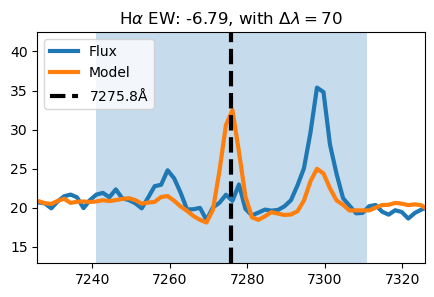

In [370]:
dlBest = 70
ewBest = np.asarray(ewLL)[np.asarray(dwList)==20][0]
#-------------------
lamCenter = 6564.61 # H-Alpha
lamCenter *= (1+redShift)
dw = 50 # range to fit normalization to
wMin, wMax = lamCenter-dw, lamCenter+dw
plt.figure(figsize=(5,3));
plt.plot(lam, flux0, lw=3, label='Flux');
plt.plot(lam, fluxModel, lw=3, label='Model');
ax = plt.gca()
ax.set_xlim(wMin, wMax)
ax.axvline(lamCenter, c='k', label=fr'{lamCenter:.1f}$\mathrm{{\AA}}$', lw=3, ls='--');
l3 = (lam>wMin)&(lam<wMax)
ax.set_ylim(min(flux0[l3])-.3*min(flux0[l3]), max(flux0[l3])+.2*max(flux0[l3]))
#--------------------------------------
dl = dlBest  # range to look for EW
l1, l2 = (lamCenter-dl/2)*u.AA, (lamCenter+dl/2)*u.AA
ax.axvspan(l1.value, l2.value, alpha=0.25);
#--------------------------------------
plt.title(fr"H$\alpha$ EW: {ewBest:.2f}, with $\Delta \lambda=${dlBest}");
plt.legend();

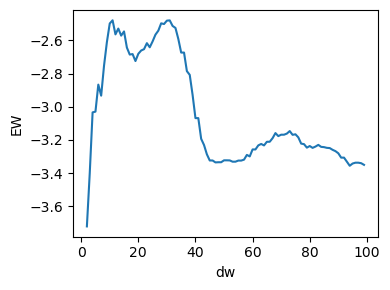

In [371]:
#lamCenter = 4102.89 # H-Delta
lamCenter = 6564.61 # H-Alpha
#lamCenter = 3729.88 # [OII] 3727
lamCenter *= (1+redShift)
#dw = 50 # range to fit normalization to
#wMin, wMax = lamCenter-dw, lamCenter+dw
#-------------------------------------------
from scipy.interpolate import make_interp_spline, interp1d
def interp(w, f, wMin=1e3, wMax=1e7, length = 1):
    wInterp = np.linspace(wMin, wMax, length*len(w))
    spl = make_interp_spline(w, f)
    fInterp = spl(wInterp)
    return wInterp, fInterp
wav1, fluxFit = interp(lam, flux0, wMin=wMin, wMax=wMax)
#-------------------
import heapq
closest = lambda lst, K, n=1: heapq.nsmallest(n, lst, key=lambda x: abs(x-K))
#-------------------
dwList = []
ewLL = []
#flux1=flux0
flux1=fluxModel
for dww in np.arange(1,100,1):
    dwList.append(dww)
    dList, ewL0, ewL1, ewL2, ewL3, ewL4, ewL5 = [], [], [], [], [], [], []
    dll = [70] # range to look for EW
    for dl in dll:
        l1, l2 = (lamCenter-dl/2)*u.AA, (lamCenter+dl/2)*u.AA
        f1 = flux1[lam==lam[np.argmin(np.abs(lam-l1.value))]][0] 
        f2 = flux1[lam==lam[np.argmin(np.abs(lam-l2.value))]][0]
        l3 = (lam>l1.value)&(lam<l2.value)
        fS, x = flux1[l3], lam[l3]
        lL, lR = l1.value-dww, l2.value+dww
        fL = np.mean(flux1[(lam>lL)&(lam<l1.value)])
        fR = np.mean(flux1[(lam>l2.value)&(lam<lR)])
        fC = np.mean([fL, fR])
        #print(fL, fR, fC, '\n')
        coefficients = np.polyfit([np.mean([lL,l1.value]), np.mean([lR,l2.value])], [fL, fR], 1)
        poly = np.poly1d(coefficients)
        fC = poly(x)
        ewL0.append(integrate.cumtrapz(1-fS/fC, x)[-1])
    #------------------------------
    inds = [0]
    dlBest = dll[min(inds)]
    ewBest = ewL0[min(inds)]
    #dM, dP = dll[min(inds)-5], dll[min(inds)+5]
    #ewM, ewP = np.asarray(ewL0)[dll==dM][0], np.asarray(ewL0)[dll==dP][0]
    #ewErrP = abs(ewP-ewBest)
    #ewErrM = abs(ewM-ewBest)
    # ewErr0 = np.sqrt(abs(ewBest))/2
    # ewErrP = np.sqrt(ewErrP**2+ewErr0**2)
    # ewErrM = np.sqrt(ewErrM**2+ewErr0**2)
    #print(f"dw={dww}, dl = {dlBest}, EW: {ewBest:.2f} (+{ewErrP:.2f}/-{ewErrM:.2f})")
    #plt.show();
    ewLL.append(ewBest)
plt.figure(figsize=(4,3))
plt.plot(dwList, ewLL)
#plt.gca().axhline(-4.64);
plt.xlabel('dw');plt.ylabel('EW');
plt.tight_layout()

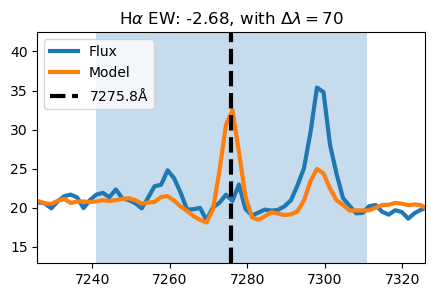

In [372]:
dlBest = 70
ewBest = np.asarray(ewLL)[np.asarray(dwList)==20][0]
#-------------------
lamCenter = 6564.61 # H-Alpha
lamCenter *= (1+redShift)
dw = 50 # range to fit normalization to
wMin, wMax = lamCenter-dw, lamCenter+dw
plt.figure(figsize=(5,3));
plt.plot(lam, flux0, lw=3, label='Flux');
plt.plot(lam, fluxModel, lw=3, label='Model');
ax = plt.gca()
ax.set_xlim(wMin, wMax)
ax.axvline(lamCenter, c='k', label=fr'{lamCenter:.1f}$\mathrm{{\AA}}$', lw=3, ls='--');
l3 = (lam>wMin)&(lam<wMax)
ax.set_ylim(min(flux0[l3])-.3*min(flux0[l3]), max(flux0[l3])+.2*max(flux0[l3]))
#--------------------------------------
dl = dlBest  # range to look for EW
l1, l2 = (lamCenter-dl/2)*u.AA, (lamCenter+dl/2)*u.AA
ax.axvspan(l1.value, l2.value, alpha=0.25);
#--------------------------------------
plt.title(fr"H$\alpha$ EW: {ewBest:.2f}, with $\Delta \lambda=${dlBest}");
plt.legend();

In [381]:
from specutils import Spectrum1D
from specutils import SpectralRegion
from specutils.analysis import equivalent_width
from specutils.analysis import fwhm
#----------------------------------
lamCenter = 6564.61 # H-Alpha
lamCenter *= (1+redShift)
dlBest = 70
l1, l2 = (lamCenter-dlBest/2)*u.AA, (lamCenter+dlBest/2)*u.AA
spec1 = Spectrum1D(spectral_axis=lam*u.AA, flux=fluxLam)
EW = equivalent_width(spec1, regions=SpectralRegion(l1, l2))
print(f"Equivalent Width fr/ Fun: {EW:.2f}")

Equivalent Width fr/ Fun: 70.35 Angstrom
